<a href="https://colab.research.google.com/github/misalsachin/car-brand-prediction-Resnet50/blob/master/Car_Brand_Prediction_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/misalsachin/car-brand-prediction-Resnet50.git

Cloning into 'car-brand-prediction-Resnet50'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 70 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/car-brand-prediction-Resnet50/Train'
valid_path = '/content/car-brand-prediction-Resnet50/Test'

In [4]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/car-brand-prediction-Resnet50/Train/*')

In [7]:
folders

['/content/car-brand-prediction-Resnet50/Train/Ertiga',
 '/content/car-brand-prediction-Resnet50/Train/Alto',
 '/content/car-brand-prediction-Resnet50/Train/Kwid']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/car-brand-prediction-Resnet50/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 32 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/car-brand-prediction-Resnet50/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 25 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 5.0302 - accuracy: 0.4688 - val_loss: 1.9228 - val_accuracy: 0.4400
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 2.0341 - accuracy: 0.5000 - val_loss: 1.7178 - val_accuracy: 0.5200
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 1.4318 - accuracy: 0.5312 - val_loss: 3.9536 - val_accuracy: 0.3600
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 3.6914 - accuracy: 0.4688 - val_loss: 4.5284 - val_accuracy: 0.3600
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 4.2520 - accuracy: 0.4688 - val_loss: 3.5421 - val_accuracy: 0.4400
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 3.3113 - accuracy: 0.4688 - val_loss: 2.6979 - val_accuracy: 0.4800
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 2.3647 - accuracy: 0.5312 - val_loss: 1.9874 - val_accuracy: 0.4000
Epoch 8/30
1/1 [=========================

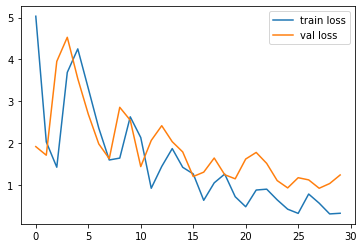

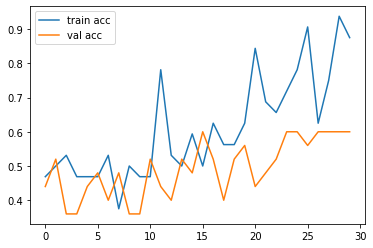

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[2.2569301e-02, 2.1504703e-01, 7.6238364e-01],
       [4.9788657e-01, 3.0264038e-01, 1.9947301e-01],
       [3.9910808e-01, 5.0448525e-01, 9.6406735e-02],
       [1.9076157e-02, 7.1204197e-01, 2.6888192e-01],
       [1.3175175e-01, 2.6294947e-01, 6.0529876e-01],
       [8.2800183e-03, 5.6502830e-02, 9.3521714e-01],
       [2.6860531e-02, 9.7277439e-01, 3.6505156e-04],
       [4.1070642e-04, 5.0539123e-03, 9.9453545e-01],
       [1.6991068e-03, 6.8236655e-01, 3.1593424e-01],
       [1.6091127e-02, 9.6903563e-01, 1.4873296e-02],
       [3.4983702e-02, 9.6498311e-01, 3.3151937e-05],
       [4.8364364e-02, 2.5822178e-01, 6.9341385e-01],
       [2.5106403e-01, 2.3354076e-01, 5.1539516e-01],
       [3.4533866e-02, 7.4001551e-01, 2.2545061e-01],
       [4.7100610e-01, 4.5977548e-01, 6.9218427e-02],
       [9.1982067e-02, 9.0559733e-01, 2.4205602e-03],
       [4.2022333e-02, 5.7641548e-01, 3.8156223e-01],
       [8.4330020e-03, 4.3772046e-02, 9.4779497e-01],
       [1.3640563e-03, 1.820

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [47]:
img=image.load_img('/content/car-brand-prediction-Resnet50/Test/Ertiga/3.jpg',target_size=(224,224))

In [48]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255
x

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
img_data

array([[[[-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         ...,
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        [[-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         ...,
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        [[-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         ...,
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        ...,

        [[-102.939   , -115.779   , -1

In [53]:
model.predict(img_data)

array([[0.0010161 , 0.9703677 , 0.02861613]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)

In [56]:
a==1

array([ True])